<function matplotlib.pyplot.show(close=None, block=None)>

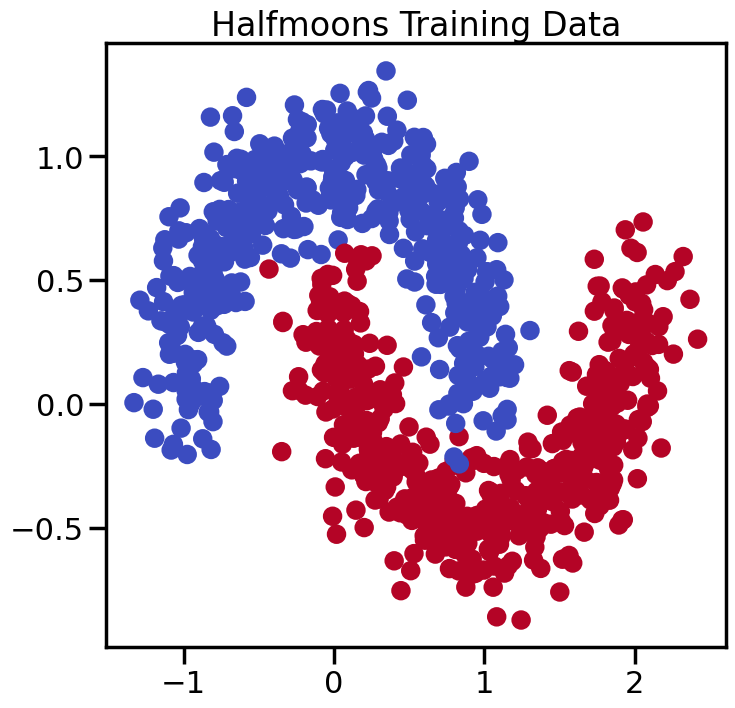

In [4]:
# Custom Imports
import sys
sys.path.append("../..")
sys.path.append("..")
import GradCertModule
import XAIArchitectures
# Deep Learning Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import models, transforms
import pytorch_lightning as pl
# Standard Lib Imports
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set_context('poster')

X, y = datasets.make_moons(n_samples=1000, noise=0.15, random_state=42)
X_train = X[0:800]
X_test = X[800:]

y_train = y[0:800]
y_test = y[800:]

plt.figure(figsize=(8,8), dpi=100)
plt.title("Halfmoons Training Data")
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='coolwarm')
plt.show

In [11]:

eps = 0.0
alp = 0.0

def get_model(alp, eps):
    mode = 'GRAD'
    model = XAIArchitectures.FullyConnected(hidden_dim=256, hidden_lay=2,
                                            dataset="HALFMOONS", mode=mode)

    MODEL_ID = "Halfmoons_a=%s_e=%s"%(alp, eps)
    ckpt = torch.load("Models/%s.ckpt"%(MODEL_ID))
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    checkpoint = torch.load("Models/%s.ckpt"%(MODEL_ID))
    model.load_state_dict(torch.load('Models/%s.pt'%(MODEL_ID)))
    return model


SET MODE TO:  GRAD


<Figure size 3000x3000 with 0 Axes>

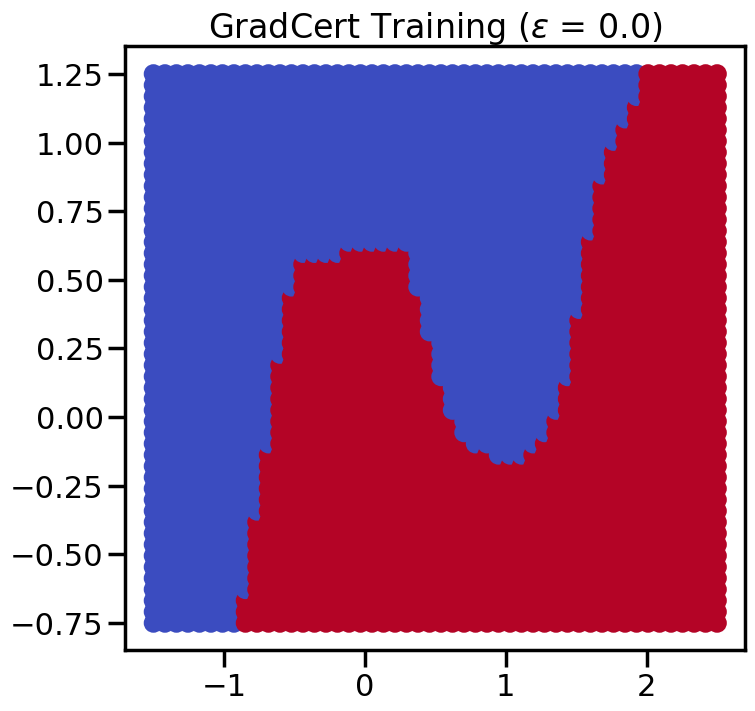

In [37]:
import seaborn as sns
sns.set_context('poster')
plt.figure(figsize=(20,20), dpi=150)

eps_vals = [0.0, 0.05, 0.10, 0.15, 0.2, 0.25]
alp_vals = [0.0, 0.05, 0.10, 0.15, 0.2, 0.25]

 
alp = 0.05
eps = 0.0
model = get_model(alp, eps)
X_preds = []
y_preds = []
for x in np.linspace(-1.5,2.5,50):
    for y in np.linspace(-0.75,1.25,50):
        y_hat = model(torch.Tensor([[x,y]]))
        X_preds.append([x,y])
        y_preds.append(torch.argmax(y_hat).detach().numpy())
X_preds = np.asarray(X_preds)
y_preds = np.asarray(y_preds)
plt.figure(figsize=(8,8), dpi=100)
#plt.subplot(len(eps_vals), len(eps_vals), indic)
plt.scatter(x=X_preds[:,0], y=X_preds[:,1], c=y_preds, cmap='coolwarm')
plt.title(r"GradCert Training ($\epsilon$ = %s)"%(eps))
plt.show()


SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD
SET MODE TO:  GRAD


<Figure size 3000x3000 with 0 Axes>

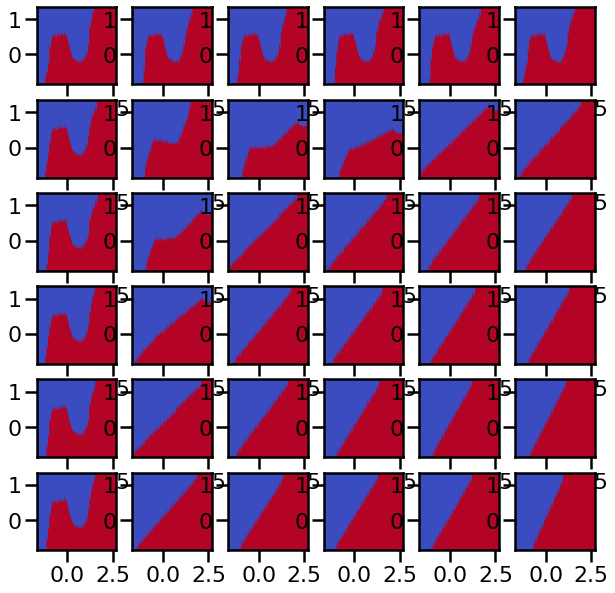

In [21]:

plt.figure(figsize=(20,20), dpi=150)

eps_vals = [0.0, 0.05, 0.10, 0.15, 0.2, 0.25]
alp_vals = [0.0, 0.05, 0.10, 0.15, 0.2, 0.25]


fig, ax = plt.subplots(len(eps_vals), len(alp_vals), figsize=(10, 10))


indic = 1
for i in range(len(eps_vals)):
    for j in range(len(alp_vals)):
        
        model = get_model(alp_vals[i], eps_vals[j])
        X_preds = []
        y_preds = []
        for x in np.linspace(-1.5,2.5,50):
            for y in np.linspace(-0.75,1.25,50):
                y_hat = model(torch.Tensor([[x,y]]))
                X_preds.append([x,y])
                y_preds.append(torch.argmax(y_hat).detach().numpy())
        X_preds = np.asarray(X_preds)
        y_preds = np.asarray(y_preds)
        #import seaborn as sns
        #sns.set_context('poster')
        #plt.figure(figsize=(8,8), dpi=100)
        #plt.subplot(len(eps_vals), len(eps_vals), indic)
        #plt.title(r"GradCert Training ($\alpha$ = %s, $\epsilon$ = %s)"%(alp,eps))
        ax[i, j].scatter(x=X_preds[:,0], y=X_preds[:,1], c=y_preds, cmap='coolwarm')
        #plt.show()

    indic += 1

plt.show()